<h2 align='center' style='color:purple'>Normal Distribution and Z Score: Math and statistics for data science</h2>

In [1]:
import pandas as pd
import seaborn as sn

We are going to use heights dataset from kaggle.com. Dataset has heights and weights 
both but I have removed weights to make it simple


https://www.kaggle.com/mustafaali96/weight-height

In [2]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


**(1) Outlier detection and removal using Standard Deviation**

In [3]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<AxesSubplot:>

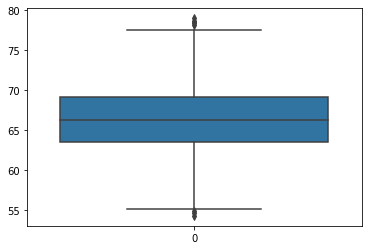

In [4]:
sn.boxplot(df.height)
#The maximum is of 78.998
#The minimum is 54.26
#The median is 66.31
# So that the data is uniformaly Normally distributed

<AxesSubplot:xlabel='height', ylabel='Count'>

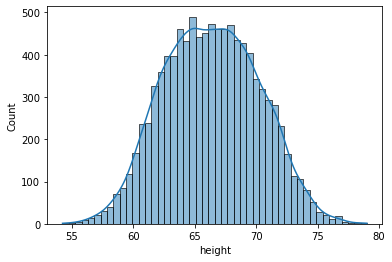

In [5]:
sn.histplot(df.height, kde=True)
#From this we observed that the data is normally distributted

In [6]:
mean = df.height.mean()
mean

66.3675597548656

In [7]:
median=df.height.median()
median

66.31807008

from above mean and median we observe that our data is follows Uniform Normal Distribution or Symmetrical Distribution

In [8]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [9]:
mean-3*std_deviation
# to calculate frm -3 to +3 sotats why we multiply with 3

54.824975392478876

In [10]:
mean+3*std_deviation
## to calculate frm -3 to +3 sotats why we multiply with 3


77.91014411725232

In [11]:
mean-3*std_deviation

54.824975392478876

In [12]:
df[df.height<54.82].shape

(2, 2)

In [13]:
df[df.height>77.91].shape

(5, 2)

Total Outliers are:2+5=7

In [14]:
df[(df.height < 54.82) | (df.height > 77.91)]
#The points which is grater than +3sigma(77.91) and less than -3sigma(54.82) called as outliers

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [15]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape
# Calcuate the required point after removing outliers

(9993, 2)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

<img height=200 width=300 src="zscore.png" />

Let's add a new column in our dataframe for this Z score

z_score=x-u/S.D

In [16]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [17]:
df.height.mean()

66.3675597548656

In [18]:
df.height.std()

3.847528120795573

In [19]:
(73.84-66.37)/3.84

1.9453124999999998

In [20]:
df[df['zscore']>3] #3-->+3 Sigma

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [21]:
df[df['zscore']>3].shape

(5, 3)

In [22]:
df[df['zscore']<-3] #-3--->-3SigmA

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [23]:
df[df['zscore']<-3].shape

(2, 3)

In [24]:
df[df['zscore']>-3].shape

(9998, 3)

In [25]:
df[df['zscore']<3].shape

(9995, 3)

In [29]:
no_of_outlier=df[(df.zscore>-3) & (df.zscore<3)]
no_of_outlier.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [28]:
no_of_outlier=df[(df.zscore>-3) & (df.zscore<3)]
no_of_outlier.shape

(9993, 3)

<h3>Exercise</h3>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result